In [ ]:
pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 3.6 MB/s eta 0:00:00


In [ ]:
pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 28.1 MB/s eta 0:00:00


In [ ]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=724ad0578c5bb1446d9ccc184f81a933645ecacf8e2fcbfc5956b630d86a2690
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
from qiskit_aer import Aer
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.circuit.library import QFT , CCXGate, UnitaryGate
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Initialize parameters
window_scaling = 2.0062463823972267
padded_result_coeffs = [2.84459484e-01, -1.60769035e-01, -6.52830735e-01, -1.40302564e-01,
    4.04440838e-01, -5.49152208e-02, -5.29882315e-01,  7.34968555e-16]

num_qubits = int(np.log2(len(padded_result_coeffs)))
qc_test = QuantumCircuit(num_qubits + 1, 1)  # Increased from num_qubits*2 to num_qubits*3 for ancilla

# Inverted initialization
qc_test.initialize(padded_result_coeffs, range(1,num_qubits+1))


# qc_test.append(QFT(num_qubits), range(num_qubits))
# qc_test.append(QFT(num_qubits), range(num_qubits, 2 * num_qubits))

# New code with CCX gates
qc_test.barrier()

qc_test.cx(1, 0)

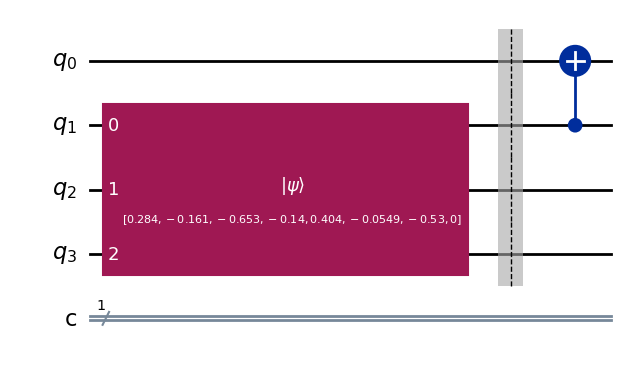

In [ ]:
qc_test.draw('mpl')

In [ ]:
# Use the Aer's Statevector simulator
simulator = Aer.get_backend('statevector_simulator')

# Transpile the quantum circuit for the simulator
compiled_circuit = transpile(qc_test, simulator)

# Run the simulation
result = simulator.run(compiled_circuit).result()

# Get the final statevector
statevector = result.get_statevector()

# Print the statevector
print("Final Statevector:", statevector)

Final Statevector: Statevector([ 2.84459484e-01+0.j,  0.00000000e+00+0.j, -0.00000000e+00+0.j,
             -1.60769035e-01+0.j, -6.52830735e-01+0.j, -0.00000000e+00+0.j,
             -0.00000000e+00+0.j, -1.40302564e-01+0.j,  4.04440838e-01+0.j,
              0.00000000e+00+0.j, -0.00000000e+00+0.j, -5.49152208e-02+0.j,
             -5.29882315e-01+0.j, -0.00000000e+00+0.j,  0.00000000e+00+0.j,
              7.34968555e-16+0.j],
            dims=(2, 2, 2, 2))


In [ ]:
# [[1, 0, 0, 0, 0, 0, 0, 0,]
#  [0, 1, 0, 0, 0, 0, 0, 0,]
#  [0, 0, 0, 0, 1, 0, 0, 0,]
#  [0, 0, 0, 0, 0, 1, 0, 0,]
#  [0, 0, 1, 0, 0, 0, 0, 0,]
#  [0, 0, 0, 1, 0, 0, 0, 0,]
#  [0, 0, 0, 0, 0, 0, 1, 0,]
#  [0, 0, 0, 0, 0, 0, 0, 1]]
from qiskit import QuantumCircuit
from qiskit.circuit.library import UnitaryGate
import numpy as np

# Define the permutation matrix
perm_matrix = np.array([
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1]
])

# Create the unitary gate from the permutation matrix
unitary_gate = UnitaryGate(perm_matrix)

# Create a controlled version of the unitary gate
controlled_gate = unitary_gate.control()

# Initialize a quantum circuit with enough qubits
qc = QuantumCircuit(4)  # Adjust the number of qubits as needed

# Apply the controlled gate (Assume control qubit is 0 and target qubits are 1, 2, 3)
qc.append(controlled_gate, [0, 1, 2, 3])

# Print the quantum circuit
print(qc)

                 
q_0: ─────■──────
     ┌────┴─────┐
q_1: ┤0         ├
     │          │
q_2: ┤1 Unitary ├
     │          │
q_3: ┤2         ├
     └──────────┘


In [ ]:
# Apply the controlled gate (Assume control qubit is 0 and target qubits are 1, 2, 3)
qc_test.append(controlled_gate, [0, 1, 2, 3])

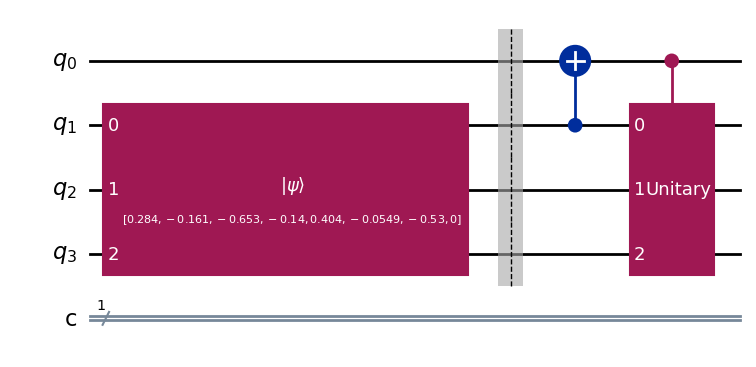

In [ ]:
qc_test.draw('mpl')

In [ ]:
qc_test.h(0)

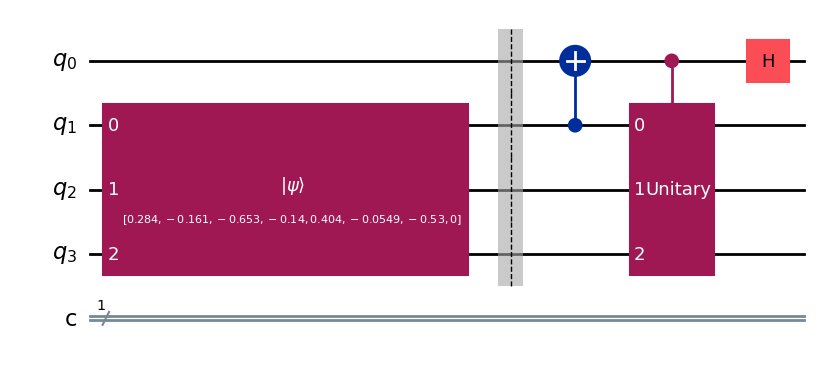

In [ ]:
qc_test.draw('mpl')

In [ ]:
qc_test.measure(0,0)
# If the reult is 0, there in other qubits we will have the sum [1, 2, (3+5), (4+6), 0, 0, 7, 8]
# we need another permutaion gate to rearrange last coefficients.

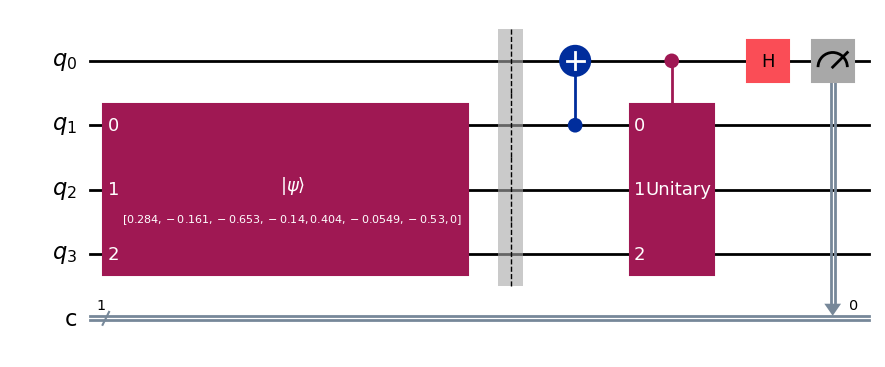

In [ ]:
qc_test.draw('mpl')

In [ ]:
# Execute the circuit on a simulator
simulator = Aer.get_backend('qasm_simulator')
state_simulator = Aer.get_backend('statevector_simulator')

compiled_circuit = transpile(qc_test, simulator)

# Run the circuit in a loop until the desired state is obtained
desired_state = '0' # Only 0 in the measured register
result_counts = None

while True:
    # qc_test.save_statevector(label = 'test', pershot = True)
    result = simulator.run(qc_test, backend=simulator, shots=1).result()
    result_counts = result.get_counts(qc_test)

    # Debug print to understand intermediate results
    print(f"Intermediate result counts: {result_counts}")
    # print(result.data(0)['test'])

    # Check if the desired state is obtained
    if desired_state in [state[-num_qubits:] for state in result_counts.keys()]:
        break


AerError: 'unknown instruction: c-unitary'

In [ ]:
# Use the Aer's Statevector simulator
simulator = Aer.get_backend('statevector_simulator')

# Transpile the quantum circuit for the simulator
compiled_circuit = transpile(qc_test, simulator)

# Run the simulation
result = simulator.run(compiled_circuit).result()

# Get the final statevector
statevector = result.get_statevector()

# Print the statevector
print("Final Statevector:", statevector)

Final Statevector: Statevector([-1.66683434e-01-1.12584333e-01j,
             -1.66683434e-01-1.12584333e-01j,
              9.42051023e-02+6.36297101e-02j,
             -9.42051023e-02-6.36297101e-02j,
              3.82536265e-01+2.58379547e-01j,
              3.82536265e-01+2.58379547e-01j,
              3.21784229e-02+2.17345310e-02j,
             -3.21784229e-02-2.17345310e-02j,
             -2.36988364e-01-1.60070957e-01j,
             -2.36988364e-01-1.60070957e-01j,
              8.22124571e-02+5.55294213e-02j,
             -8.22124571e-02-5.55294213e-02j,
              3.10492737e-01+2.09718607e-01j,
              3.10492737e-01+2.09718607e-01j,
             -5.15462122e-16-3.09401965e-16j,
              4.71884300e-16+2.79509292e-16j],
            dims=(2, 2, 2, 2))


In [ ]:
# Use the Aer's Statevector simulator
simulator = Aer.get_backend('statevector_simulator')

# Transpile the quantum circuit for the simulator
compiled_circuit = transpile(qc_test, simulator)

# Run the simulation
result = simulator.run(compiled_circuit).result()

# Get the final statevector
statevector = result.get_statevector()

# Print the statevector
print("Final Statevector:", statevector)

Final Statevector: Statevector([-2.35725973e-01-1.59218290e-01j,
              0.00000000e+00-0.00000000e+00j,
              1.33226133e-01+8.99859991e-02j,
              0.00000000e+00-0.00000000e+00j,
              5.40987974e-01+3.65403860e-01j,
              0.00000000e+00+0.00000000e+00j,
              4.55071620e-02+3.07372686e-02j,
              0.00000000e+00-0.00000000e+00j,
             -3.35152158e-01-2.26374518e-01j,
              0.00000000e+00-0.00000000e+00j,
              1.16265972e-01+7.85304608e-02j,
              0.00000000e+00-0.00000000e+00j,
              4.39103040e-01+2.96586899e-01j,
              0.00000000e+00+0.00000000e+00j,
             -7.28973524e-16-4.37560455e-16j,
              0.00000000e+00+0.00000000e+00j],
            dims=(2, 2, 2, 2))


Final Statevector: Statevector ([ 2.84459484e-01+0.j,  0.00000000e+00+0.j, -0.00000000e+00+0.j,
             -1.60769035e-01+0.j, -6.52830735e-01+0.j, -0.00000000e+00+0.j,
             -0.00000000e+00+0.j, -1.40302564e-01+0.j,  4.04440838e-01+0.j,
              0.00000000e+00+0.j, -0.00000000e+00+0.j, -5.49152208e-02+0.j,
             -5.29882315e-01+0.j, -0.00000000e+00+0.j,  0.00000000e+00+0.j,
              7.34968555e-16+0.j],
            dims=(2, 2, 2, 2))



---


---



---


